# Importando bibliotecas

In [1]:
import sys
import os
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
import pandas as pd
import dataframe_image as dfi

sys.path.append(os.path.join('..','..'))

import toolkit as tk

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Importando as instâncias e separando em real, simuladas e desenhadas

In [2]:
real_instances, simulated_instances, drawn_instances = tk.get_all_labels_and_files()
tk.load_instance(real_instances[0])


,label,well,id,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
timestamp,,,,,,,,,,,,
2017-02-01 02:02:07,0,WELL-00001,20170201020207,0.0,10092110.0,119.0944,1609800.0,84.59782,1564147.0,NaN,0.0,0
2017-02-01 02:02:08,0,WELL-00001,20170201020207,0.0,10092000.0,119.0944,1618206.0,84.58997,1564148.0,NaN,0.0,0
2017-02-01 02:02:09,0,WELL-00001,20170201020207,0.0,10091890.0,119.0944,1626612.0,84.58213,1564148.0,NaN,0.0,0
2017-02-01 02:02:10,0,WELL-00001,20170201020207,0.0,10091780.0,119.0944,1635018.0,84.57429,1564148.0,NaN,0.0,0
2017-02-01 02:02:11,0,WELL-00001,20170201020207,0.0,10091670.0,119.0944,1643424.0,84.56644,1564148.0,NaN,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-01 06:59:56,0,WELL-00001,20170201020207,0.0,10014690.0,119.0453,1504822.0,83.44021,1567749.0,NaN,0.0,0
2017-02-01 06:59:57,0,WELL-00001,20170201020207,0.0,10014690.0,119.0452,1510422.0,83.45413,1567749.0,NaN,0.0,0
2017-02-01 06:59:58,0,WELL-00001,20170201020207,0.0,10014690.0,119.0451,1516023.0,83.46806,1567750.0,NaN,0.0,0


In [3]:
print('Real instances:', len(real_instances))
print('Simulated instances:', len(simulated_instances))
print('Drawn instances:', len(drawn_instances))

Real instances: 1019
Simulated instances: 939
Drawn instances: 20


# Função que mostra o comportamento de uma instância em função do tempo realçando as classificações

In [15]:
def plot_sensor(df):
    # Substituindo valores de 'class' e convertendo 'timestamp'
    df['timestamp'] = pd.to_datetime(df.index)
    df['class'] = df['class'].replace(101, -1)
    
    # troque valores faltantes NaN por 2 da coluna 'class'
    df['class'] = df['class'].fillna(2)


    # Definindo o eixo X e configurações de plotagem
    x_hours = df['timestamp']
    sensor_columns = ['P-PDG', 'P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP']  # Atualizado para incluir 'class'
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'black']  # Atualizado para corresponder ao número de colunas 
    class_colors = {0: 'lightgreen', 1: 'lightcoral', -1: 'lightyellow', 2: 'lightgrey'}
    legend_class = {0: 'Normal', -1: 'Transiente de Anomalia', 1: 'Estável de Anomalia', 2: 'Não Rotulado'}


    instance_label_dict = {
        0: 'Operação Normal',
        1: 'Aumento Abrupto de BSW',
        2: 'Fechamento Espúrio de DHSV',
        3: 'Intermitência Severa',
        4: 'Instabilidade na Vazão',
        5: 'Perda Rápida de Produtividade',
        6: 'Restrição Rápida em PCK',
        7: 'Incrustações em PCK',
        8: 'Hidrato na Linha de Produção'
    }


    plt.figure(figsize=(6, 12))  # Ajustado para acomodar todos os subplots
    patches = [mpatches.Patch(color=class_colors[cls], label=label) for cls, label in legend_class.items()]

    for i, column in enumerate(sensor_columns):
        ax = plt.subplot(len(sensor_columns), 1, i + 1)  # Ajustado para criar um subplot para cada coluna
        ax.plot(x_hours, df[column], color=colors[i]) # comment  label=column)
        ax.set_title(column)
        ax.set_xlabel('Tempo (h)')
        ax.set_ylabel('Pressão (Pa)' if column in ['P-PDG', 'P-TPT', 'P-MON-CKP'] else 'Temperatura (°C)')
        ax.grid(True)
        #ax.legend()

       # Pintando a área de fundo de acordo com a classe
        start_idx = 0
        for j in range(1, len(df)):
            if df.iloc[j]['class'] != df.iloc[j-1]['class'] or j == len(df) - 1:
                end_idx = j
                cls = df.iloc[start_idx]['class']
                ax.axvspan(df.iloc[start_idx]['timestamp'], df.iloc[end_idx]['timestamp'], color=class_colors.get(cls, 'lightgrey'), alpha=0.5)
                start_idx = j

        ax.xaxis.set_major_locator(mdates.HourLocator(interval=3))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        
        # Rotacionando os ticks do eixo X especificamente para este subplot
        for label in ax.get_xticklabels():
            label.set_rotation(0)


    #plt.suptitle(instance_label_dict[df['label'].values[0]], fontsize=16, y=1.02)  # y é ajustado para evitar sobreposição com o topo do subplot superior


    plt.tight_layout()
    
# Adicionando legenda de classes ao gráfico com ajuste de posição
    # troque a localização para baixo e para a direita para evitar sobreposição com o gráfico
    plt.figlegend(handles=patches, loc='lower right', title='Classificação', bbox_to_anchor=(1.38, -0.08), bbox_transform=plt.gcf().transFigure)
        

    plt.savefig(f"{instance_label_dict[df['label'].values[0]]}.jpg", dpi=100, bbox_inches='tight')
    plt.grid(True)
    plt.show()


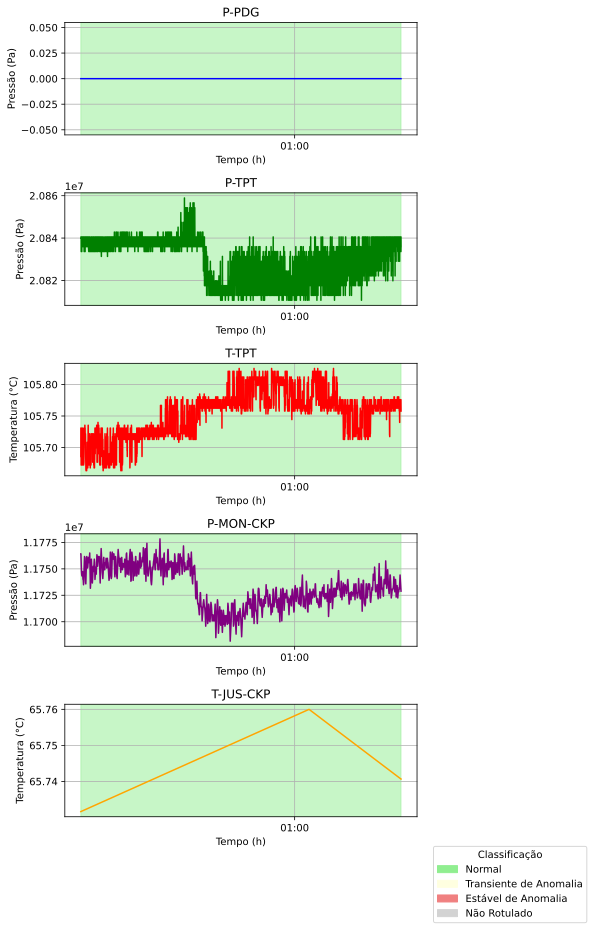

In [16]:
plot_sensor(tk.load_instance(real_instances[400]))

# Concatena em só dataframe um tipo de well

In [ ]:
from pathlib import WindowsPath
import re

dataframes_list = []
for instances in real_instances:
   
    instance_path_str = str(instances[1])
    well_id_search = re.search(r'WELL-00001', instance_path_str)

    if well_id_search:
        
        dataframes_list.append(pd.DataFrame(tk.load_instance(instances)))


df_well = pd.concat(dataframes_list, ignore_index=True)
df_well.head()
        



In [ ]:
df_well['label'].unique()

# Concatena em só dataframe todas as instâncias de um tipo

In [3]:
combined_df = pd.read_csv('combined_df.csv')
#  pegue todos os registros da coluna label = 1
combined = combined_df[combined_df['label'] == 2]
combined

,label,well,id,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
10215291,2,WELL-00002,20131104014101,0.0,18852350.0,116.778200,9599435.0,173.0961,2902859.0,NaN,0.0,0.0
10215292,2,WELL-00002,20131104014101,0.0,18852350.0,116.778100,9599434.0,173.0961,2902867.0,NaN,0.0,0.0
10215293,2,WELL-00002,20131104014101,0.0,18852350.0,116.778000,9599432.0,173.0961,2902875.0,NaN,0.0,0.0
10215294,2,WELL-00002,20131104014101,0.0,18852350.0,116.777900,9599431.0,173.0961,2902882.0,NaN,0.0,0.0
10215295,2,WELL-00002,20131104014101,0.0,18852350.0,116.777900,9599429.0,173.0961,2902890.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10409519,2,WELL-00013,20170329020229,0.0,10763410.0,8.439219,NaN,NaN,NaN,NaN,2.0,NaN
10409520,2,WELL-00013,20170329020229,0.0,10764910.0,8.437844,NaN,NaN,NaN,NaN,2.0,NaN
10409521,2,WELL-00013,20170329020229,0.0,10766400.0,8.436469,NaN,NaN,NaN,NaN,2.0,NaN
10409522,2,WELL-00013,20170329020229,0.0,10767900.0,8.435095,NaN,NaN,NaN,NaN,2.0,NaN


In [ ]:
combined_df.info()

In [ ]:
#combined.info
combined['timestamp'] = pd.to_datetime(combined.index)
# pegue o minimo valor de hora e o maximo valor de hora da coluna timestamp
min_hour = combined['timestamp'].min()
max_hour = combined['timestamp'].max()

print(min_hour, max_hour)

# diferença em horas entre min_hour e max_hour

diff = max_hour - min_hour
print(diff)

# Pegar qual instância pertence a qual evento indesejado

In [ ]:

list_instances = {}
index = 0
for instance in real_instances:
    df = tk.load_instance(instance)   

    list_instances[index] = df['label'].drop_duplicates().tolist()

    index = index + 1

In [ ]:
# get index from value 1 in list_instances

tipo = 0

index = [k for k, v in list_instances.items() if tipo in v]
print(index)

In [ ]:
df = tk.load_instance(real_instances[589])
df['P-PDG'].drop_duplicates().tolist()

# Pega o intervalo de tempo de uma instância

In [ ]:
df = tk.load_instance(real_instances[594])
df['timestamp'] = pd.to_datetime(df.index)
# pegue o minimo valor de hora e o maximo valor de hora da coluna timestamp
min_hour = df['timestamp'].min()
max_hour = df['timestamp'].max()

print(min_hour, max_hour)

# diferença em horas entre min_hour e max_hour

diff = max_hour - min_hour
print(diff)



# Bloxplot

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

def quartiles_plot(df, sensors, title):
    # Garantir que os valores de 'class' estejam no formato correto
    df['class'].fillna('-1', inplace=True)
    df['class'] = df['class'].astype(float).astype(int).astype(str)
    
    base_colors = {'Normal': 'lightgreen', 'Estável de Anomalia': 'lightcoral', 'Transiente de Anomalia': 'lightyellow', 'Não Rotulado': 'lightgrey'}
    legend_class = {
        '0': 'Normal', 
        '-1': 'Não Rotulado',
        **{str(i): 'Estável de Anomalia' for i in range(1, 9)},
        **{str(100 + i): 'Transiente de Anomalia' for i in range(1, 9)}
    }
    
    # Aplicar cores com base em legend_class para manter consistência
    class_colors = {cls: base_colors[label] for cls, label in legend_class.items()}
    
    # Gerar patches para a legenda de forma otimizada
    unique_labels = np.unique(list(legend_class.values()))
    patches = [mpatches.Patch(color=base_colors[label], label=label) for label in unique_labels]
    

    # Calculando a frequência das classes e identificando as top classes
    class_counts = df['class'].value_counts()
    top_classes = class_counts.nlargest(100).index

    # Filtrando os dados para incluir apenas as top classes
    filtered_data = df[df['class'].isin(top_classes)]

    # Definindo o layout dos subplots para ter dois gráficos por linha
    n_vars = len(sensors)
    ncols = 2
    nrows = int(np.ceil(n_vars / ncols))

    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 6 * nrows), squeeze=False)
    axes = axes.flatten()

    # Iterar sobre cada sensor para criar os gráficos
    for i, var in enumerate(sensors):
        class_palette = {cls: class_colors.get(cls, 'gray') for cls in filtered_data['class'].unique()}
        sns.boxplot(x='class', y=var, data=filtered_data, ax=axes[i], palette=class_palette, showfliers=False)
        axes[i].set_title(f'Distribuição de {var} por Classificação')
        axes[i].set_xlabel('Classificação')
        axes[i].set_ylabel('Pressão (Pa)' if var in ['P-PDG', 'P-TPT', 'P-MON-CKP'] else 'Temperatura (°C)')
        axes[i].tick_params(axis='x', rotation=0)
        axes[i].grid(True)

    # Esconder eixos vazios se o número de sensores não preencher completamente a última linha
    for j in range(i + 1, nrows * ncols):
        fig.delaxes(axes[j])


    # Dicionário para armazenar os resultados
    quartiles_results = {}

    # Iterar sobre cada sensor
    for var in sensors:
        quartiles_results[var] = {}
        for cls in filtered_data['class'].unique():
            data = filtered_data[filtered_data['class'] == cls][var]
            quartiles = data.quantile([0.25, 0.5, 0.75]).to_dict()
            quartiles_results[var][cls] = quartiles
    
    print(quartiles_results)

    plt.tight_layout()
    plt.figlegend(handles=patches, loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=4, title='Classificação')
    plt.subplots_adjust(bottom=0.15, top=0.95)

    plt.savefig(f"{title}.jpg", dpi=100, bbox_inches='tight')
    plt.grid(True)
    plt.show()
 

In [18]:
import pandas as pd

# Supondo que real_instances seja uma lista de identificadores para suas instâncias de dados
# e que tk.load_instance(instance) retorne um DataFrame ou algo que pd.DataFrame() possa converter em um DataFrame
dataframes_list = [pd.DataFrame(tk.load_instance(instance)) for instance in real_instances]

# Concatenar todos os DataFrames na lista para formar um único DataFrame
combined_df = pd.concat(dataframes_list, ignore_index=True)

In [20]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14516197 entries, 0 to 14516196
Data columns (total 12 columns):
 #   Column      Dtype  
---  ------      -----  
 0   label       int64  
 1   well        object 
 2   id          object 
 3   P-PDG       float64
 4   P-TPT       float64
 5   T-TPT       float64
 6   P-MON-CKP   float64
 7   T-JUS-CKP   float64
 8   P-JUS-CKGL  float64
 9   T-JUS-CKGL  float64
 10  QGL         float64
 11  class       float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1.3+ GB


In [ ]:
combined = df_well[df_well['label'] == 0]

sensors = ['P-PDG','P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP']

quartiles_plot(combined, sensors, 'Quartis de WELL-00005')

C:\Users\kaike\AppData\Local\Temp\ipykernel_20492\1259641755.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\kaike\AppData\Local\Temp\ipykernel_20492\1259641755.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



{'P-PDG': {'0': {0.25: 0.0, 0.5: 0.0, 0.75: 25578450.0}, '-1': {0.25: 31337440.0, 0.5: 31411385.0, 0.75: 31764040.0}}, 'P-TPT': {'0': {0.25: 8498905.0, 0.5: 13389200.0, 0.75: 18233910.0}, '-1': {0.25: 16660020.0, 0.5: 16747650.0, 0.75: 17028520.0}}, 'T-TPT': {'0': {0.25: 116.4031, 0.5: 116.8143, 0.75: 117.6531}, '-1': {0.25: 110.4974, 0.5: 110.5936, 0.75: 110.8517}}, 'P-MON-CKP': {'0': {0.25: 1632684.0, 0.5: 2460303.5, 0.75: 11489000.0}, '-1': {0.25: 8151122.0, 0.5: 8206122.0, 0.75: 8488470.0}}, 'T-JUS-CKP': {'0': {0.25: 67.25748, 0.5: 73.45697, 0.75: 76.55065}, '-1': {0.25: nan, 0.5: nan, 0.75: nan}}}


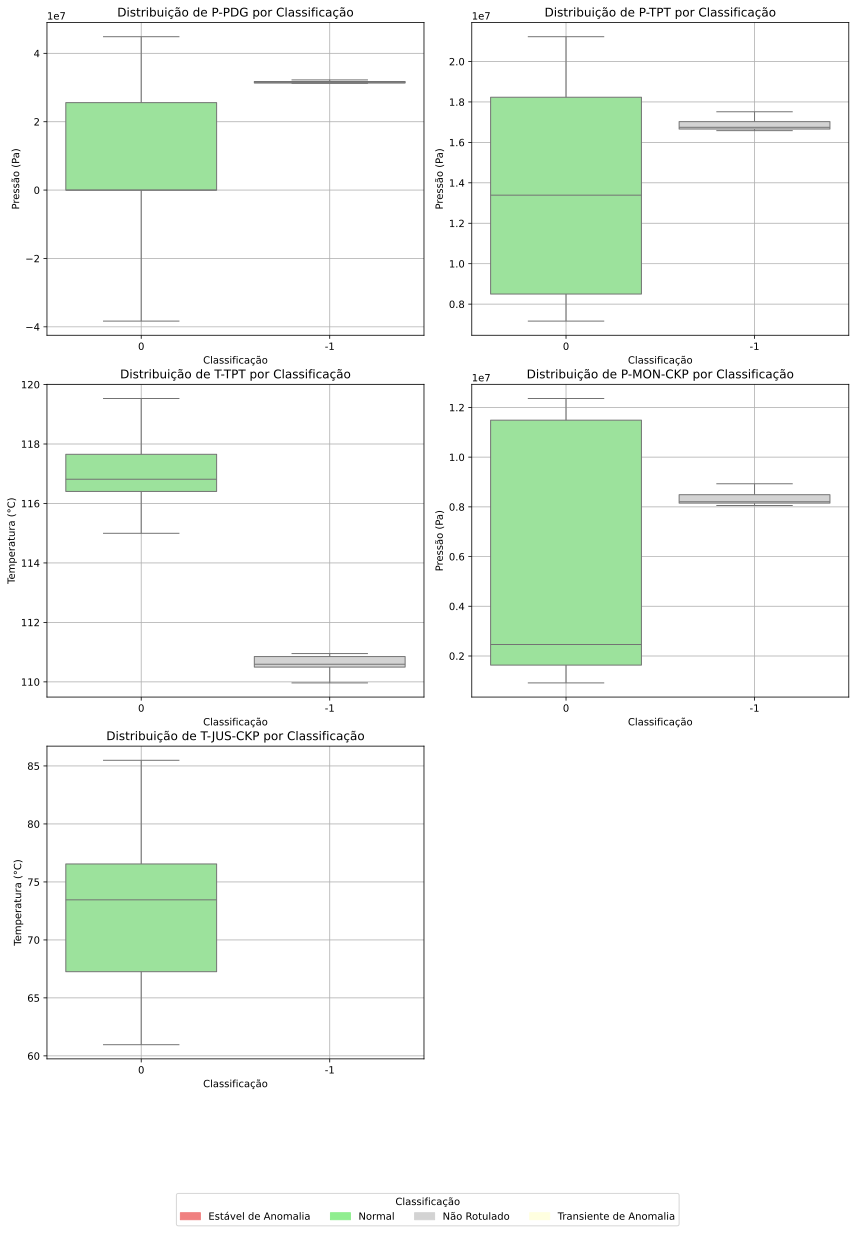

In [19]:
combined = combined_df[combined_df['label'] == 0]

sensors = ['P-PDG','P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP']

quartiles_plot(combined, sensors, 'Quartis de Operação Normal')

In [ ]:
combined = combined_df[combined_df['label'] == 1]

sensors = ['P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP']

quartiles_plot(combined, sensors, 'Quartis de Aumento Abrupto de BSW')

In [ ]:
combined = combined_df[combined_df['label'] == 2]

sensors = ['P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP']

quartiles_plot(combined, sensors, 'Quartis de Fechamento Espúrio de DHSV')

In [ ]:
combined = combined_df[combined_df['label'] == 3]

sensors = ['P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP']

quartiles_plot(combined, sensors, 'Quartis de Intermitência Severa')

In [ ]:
combined = combined_df[combined_df['label'] == 4]

sensors = ['P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP']

quartiles_plot(combined, sensors, 'Quartis de Instabilidade na Vazão')

In [ ]:
combined = combined_df[combined_df['label'] == 5]

sensors = ['P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP']

quartiles_plot(combined, sensors, 'Quartis de Perda Rápida de Produtividade')

In [ ]:
combined = combined_df[combined_df['label'] == 6]

sensors = ['P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP']

quartiles_plot(combined, sensors, 'Quartis de Restrição Rápida em PCK')

In [ ]:
combined = combined_df[combined_df['label'] == 7]

sensors = ['P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP']

quartiles_plot(combined, sensors, 'Quartis de Incrustações em PCK')

In [ ]:
combined = combined_df[combined_df['label'] == 8]

sensors = ['P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP']

quartiles_plot(combined, sensors, 'Quartis de Hidrato na Linha de Produção')

# Mapa de correlação

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

combined = combined_df #[combined_df['label'] == 0]
title = 'Mapa de Calor do sensores em Operação Normal'
# Selecionando apenas as colunas de interesse
columns_of_interest = ['P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP']
data_selected = combined[columns_of_interest]

# Calculando a matriz de correlação
correlation_matrix = data_selected.corr()

# Criando o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title(title)
plt.savefig(f"{title}.png", dpi=100, bbox_inches='tight')
plt.show()


# Exportar para cvs uma instância

In [ ]:
df = tk.load_instance(real_instances[594])

# selecione somente os primeiros 1000 registros
df = df.head(1000)


In [ ]:
df.to_csv('real_instances_594.csv')

In [4]:


df = tk.load_instance(real_instances[0])

df_export = df.head(10)

dfi.export(df_export, 'df_export_real_instances_0.jpg')

# Avaliar qual well é melhor que outro em relação a valores NaN na coluna class

In [5]:
import pandas as pd
import re

# Presumindo que real_instances esteja definido corretamente em algum lugar acima

wells = [
    'WELL-00001', 'WELL-00002', 'WELL-00003', 'WELL-00004', 'WELL-00005',
    'WELL-00006', 'WELL-00007', 'WELL-00008', 'WELL-00009', 'WELL-00010',
    'WELL-00011', 'WELL-00012', 'WELL-00013', 'WELL-00014', 'WELL-00015',
    'WELL-00016', 'WELL-00017', 'WELL-00018'
]

nan_percentages = {well: 0 for well in wells}  # Inicializa para calcular o percentual de NaNs

for well in wells:
    dataframes_list = []  # Reinicializa a lista para cada poço
    for instance in real_instances:
        instance_path_str = str(instance[1])
        pattern = rf'{well}'
        if re.search(pattern, instance_path_str):           
            try:
                df = pd.read_csv(instance[1])  # Lê o DataFrame
                dataframes_list.append(df)  # Adiciona à lista
            except Exception as e:
                print(f"Erro ao ler o arquivo {instance[1]}: {e}")

    if dataframes_list:  # Verifica se a lista não está vazia
        df_well = pd.concat(dataframes_list, ignore_index=True)
        total_values = len(df_well['class'])  # Total de valores na coluna
       
        non_nans = df_well['class'].isna().sum()  # Conta não-NaNs        
        
        percent_nan = (non_nans / total_values)   # Percentual de NaNs
        
        nan_percentages[well] = percent_nan  # Atualiza o dicionário com o percentual de NaNs

# Encontra o poço com o menor percentual de NaNs
least_nans_well = min(nan_percentages, key=nan_percentages.get)
least_nans_percent = nan_percentages[least_nans_well]

print(f"O poço com o menor percentual de valores NaN na coluna 'class' é: {least_nans_well} com {least_nans_percent:.2f}% de valores NaN.")


O poço com o menor percentual de valores NaN na coluna 'class' é: WELL-00005 com 0.00% de valores NaN.


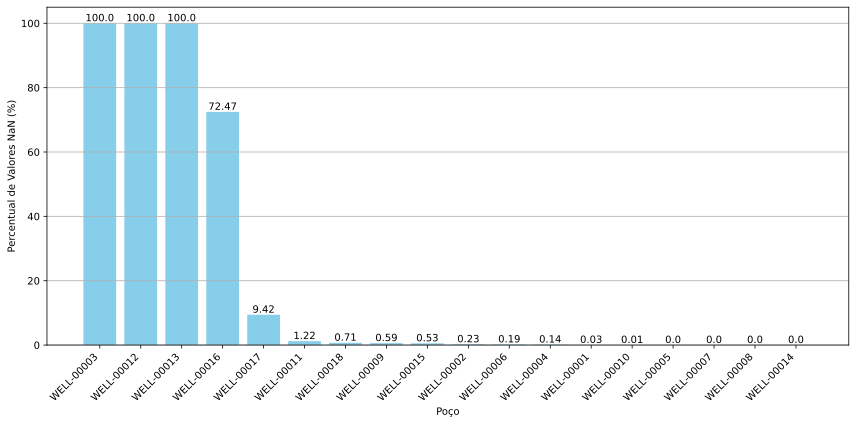

In [6]:
import matplotlib.pyplot as plt

# Ordenando o dicionário nan_percentages por seus valores (percentual de NaNs) em ordem decrescente
sorted_wells = sorted(nan_percentages.items(), key=lambda x: x[1], reverse=True)

# Separando em duas listas: uma para os poços e outra para os percentuais, já convertendo para percentual
wells = [item[0] for item in sorted_wells]
percent_nans = [item[1] * 100 for item in sorted_wells]  # Convertendo para percentual

# Definindo cores: 'skyblue' para percentuais > 0, 'lightgreen' para percentuais == 0
colors = ['lightgreen' if percent == 0 else 'skyblue' for percent in percent_nans]

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))  # Ajustando o tamanho da figura
bars = plt.bar(wells, percent_nans, color=colors)  # Aplicando as cores

plt.xlabel('Poço')  # Rótulo do eixo x
plt.ylabel('Percentual de Valores NaN (%)')  # Rótulo do eixo y
#plt.title('Percentual de Valores NaN por Poço (Ordenado)')  # Título do gráfico
plt.grid(axis='y')  # Adicionando grid ao eixo y
plt.xticks(rotation=45, ha="right")  # Rotacionando os rótulos do eixo x
plt.tight_layout()  # Ajusta os parâmetros do subplot

# Adicionando rótulos de percentual acima das barras para clareza
for bar, percent in zip(bars, percent_nans):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(percent, 2), ha='center', va='bottom')

# Mostrando o gráfico
plt.show()


In [7]:
import pandas as pd
import re

# Presumindo que real_instances esteja definido corretamente em algum lugar acima

wells = [
    'WELL-00001', 'WELL-00002', 'WELL-00003', 'WELL-00004', 'WELL-00005',
    'WELL-00006', 'WELL-00007', 'WELL-00008', 'WELL-00009', 'WELL-00010',
    'WELL-00011', 'WELL-00012', 'WELL-00013', 'WELL-00014', 'WELL-00015',
    'WELL-00016', 'WELL-00017', 'WELL-00018'
]

tipos_events = {well: 0 for well in wells}  # Inicializa para calcular o percentual de NaNs


for well in wells:
    dataframes_list = []  # Reinicializa a lista para cada poço
    for instance in real_instances:
        instance_path_str = str(instance[1])
        pattern = rf'{well}'
        if re.search(pattern, instance_path_str):           
            try:
                dataframes_list.append(pd.DataFrame(tk.load_instance(instance)))
            except Exception as e:
                print(f"Erro ao ler o arquivo {instance[1]}: {e}")

    if dataframes_list:  # Verifica se a lista não está vazia
        df_well = pd.concat(dataframes_list, ignore_index=True)
        
        # Verifica se a coluna 'label' existe
        if 'label' in df_well.columns:
            
            unique_label = df_well['label'].unique()   
            tipos_events[well] = unique_label         
            
        else:
            print(f"A coluna 'label' não foi encontrada para o poço {well}.")
            tipos_events[well] = 0  # Ou alguma outra indicação de dado ausente

tipos_events
       


{'WELL-00001': array([0, 1, 3, 4, 7], dtype=int64),
 'WELL-00002': array([0, 1, 2, 4, 6], dtype=int64),
 'WELL-00003': array([0, 2], dtype=int64),
 'WELL-00004': array([0, 4, 6], dtype=int64),
 'WELL-00005': array([0, 4], dtype=int64),
 'WELL-00006': array([0, 1, 7], dtype=int64),
 'WELL-00007': array([0, 4], dtype=int64),
 'WELL-00008': array([0], dtype=int64),
 'WELL-00009': array([2], dtype=int64),
 'WELL-00010': array([2, 4], dtype=int64),
 'WELL-00011': array([2], dtype=int64),
 'WELL-00012': array([2], dtype=int64),
 'WELL-00013': array([2], dtype=int64),
 'WELL-00014': array([3, 4], dtype=int64),
 'WELL-00015': array([5], dtype=int64),
 'WELL-00016': array([5], dtype=int64),
 'WELL-00017': array([5], dtype=int64),
 'WELL-00018': array([7], dtype=int64)}

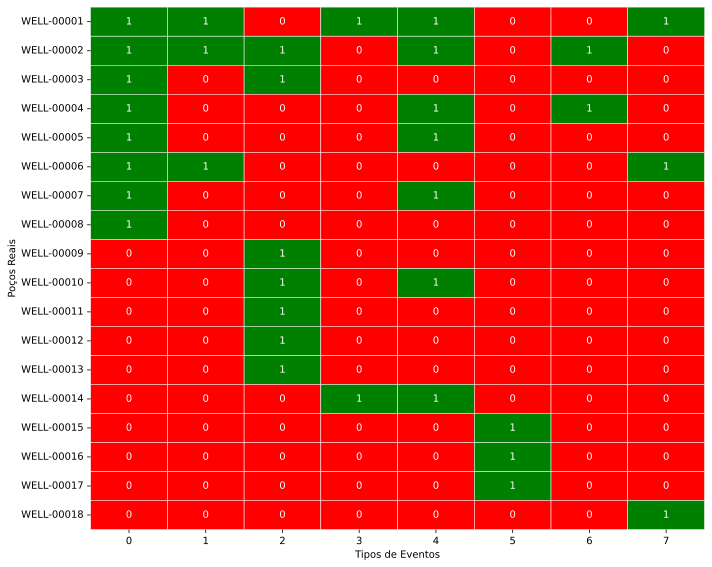

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Dados fornecidos


# Construindo o DataFrame de presença/ausência
rows = []
for well, events in tipos_events.items():
    row = [1 if event in events else 0 for event in range(8)]
    rows.append(row)
df_presence = pd.DataFrame(rows, index=tipos_events.keys(), columns=range(8))

# Definindo cores personalizadas para o gráfico de calor
cmap = ListedColormap(['red', 'green'])

# Visualização com Seaborn
plt.figure(figsize=(10, 8))
ax = sns.heatmap(df_presence, cmap=cmap, linewidths=.5, annot=True, cbar=False, yticklabels=True)

plt.xlabel("Tipos de Eventos")
plt.ylabel("Poços Reais")
#plt.title("Presença de Tipos de Eventos por Poço")
plt.xticks(ticks=[x + 0.5 for x in range(8)], labels=range(8))  # Centraliza os rótulos do eixo x
plt.tight_layout()
plt.savefig('heatmap_events.png', dpi=100, bbox_inches='tight')
plt.show()


In [17]:
# Lista de pozos que quieres incluir
wells_to_include = ['WELL-00001', 'WELL-00002', 'WELL-00004', 'WELL-00006', 'WELL-00015', 'WELL-00016']

# Filtrando el DataFrame para incluir solo los pozos en wells_to_include
df_env = combined_df[combined_df['well'].isin(wells_to_include)]

# Mostrando información del DataFrame filtrado
df_env.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9718038 entries, 0 to 14428408
Data columns (total 12 columns):
 #   Column      Dtype  
---  ------      -----  
 0   label       int64  
 1   well        object 
 2   id          int64  
 3   P-PDG       float64
 4   P-TPT       float64
 5   T-TPT       float64
 6   P-MON-CKP   float64
 7   T-JUS-CKP   float64
 8   P-JUS-CKGL  float64
 9   T-JUS-CKGL  float64
 10  QGL         float64
 11  class       float64
dtypes: float64(9), int64(2), object(1)
memory usage: 963.9+ MB


In [27]:
df_env.head()

,label,well,id,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
0,0,WELL-00001,20170201020207,0.0,10092110.0,119.0944,1609800.0,84.59782,1564147.0,NaN,0.0,0.0
1,0,WELL-00001,20170201020207,0.0,10092000.0,119.0944,1618206.0,84.58997,1564148.0,NaN,0.0,0.0
2,0,WELL-00001,20170201020207,0.0,10091890.0,119.0944,1626612.0,84.58213,1564148.0,NaN,0.0,0.0
3,0,WELL-00001,20170201020207,0.0,10091780.0,119.0944,1635018.0,84.57429,1564148.0,NaN,0.0,0.0
4,0,WELL-00001,20170201020207,0.0,10091670.0,119.0944,1643424.0,84.56644,1564148.0,NaN,0.0,0.0


In [18]:
nan_count = df_env.isna().sum()

print(nan_count)

label               0
well                0
id                  0
P-PDG            1685
P-TPT            1994
T-TPT            1983
P-MON-CKP        1344
T-JUS-CKP        2012
P-JUS-CKGL     403233
T-JUS-CKGL    9718038
QGL            403233
class           70501
dtype: int64


In [21]:
df_env_aux = df_env.drop(['P-JUS-CKGL', 'T-JUS-CKGL', 'QGL'], axis=1)

nan_count = df_env_aux.isna().sum()

print(nan_count)



label            0
well             0
id               0
P-PDG         1685
P-TPT         1994
T-TPT         1983
P-MON-CKP     1344
T-JUS-CKP     2012
class        70501
dtype: int64


In [26]:
df_limpo = df_env_aux.dropna()
df_limpo.head()

,label,well,id,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,class
0,0,WELL-00001,20170201020207,0.0,10092110.0,119.0944,1609800.0,84.59782,0.0
1,0,WELL-00001,20170201020207,0.0,10092000.0,119.0944,1618206.0,84.58997,0.0
2,0,WELL-00001,20170201020207,0.0,10091890.0,119.0944,1626612.0,84.58213,0.0
3,0,WELL-00001,20170201020207,0.0,10091780.0,119.0944,1635018.0,84.57429,0.0
4,0,WELL-00001,20170201020207,0.0,10091670.0,119.0944,1643424.0,84.56644,0.0


In [23]:
nan_count = df_limpo.isna().sum()

print(nan_count)

label        0
well         0
id           0
P-PDG        0
P-TPT        0
T-TPT        0
P-MON-CKP    0
T-JUS-CKP    0
class        0
dtype: int64


In [24]:
df['nome_da_nova_coluna'] = df.index

df_limpo.to_csv('df_env3W.csv')

In [25]:
# gere um dataframe auxiliar do df_env de até 100 MB

df_env_aux = df_limpo.head(100000)

df_env_aux.to_csv('df_env_aux_gpt.csv')